In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%load_ext tensorboard
import datetime
!rm -rf ./logs/

In [2]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

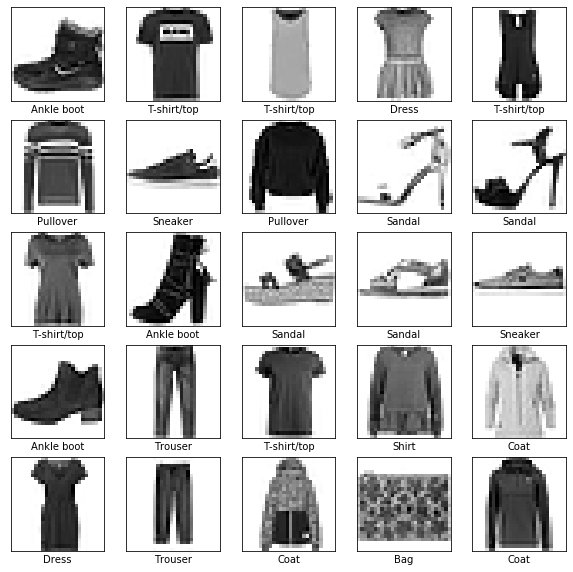

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
#Make model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
#model Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#train
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=train_images, 
          y=train_labels, 
          epochs=5, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4960 - accuracy: 0.8238 - val_loss: 0.4530 - val_accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3723 - accuracy: 0.8656 - val_loss: 0.4021 - val_accuracy: 0.8560
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8776 - val_loss: 0.3639 - val_accuracy: 0.8697
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3114 - accuracy: 0.8868 - val_loss: 0.4090 - val_accuracy: 0.8525
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8916 - val_loss: 0.3390 - val_accuracy: 0.8780


In [8]:
 %tensorboard --logdir logs/fit

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3390 - accuracy: 0.8780


In [10]:
predictions = model.predict(test_images)

In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

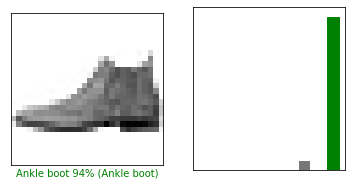

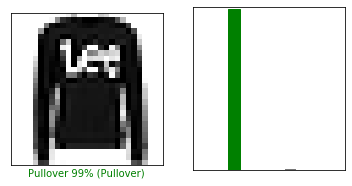

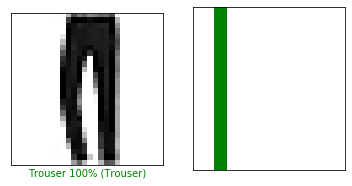

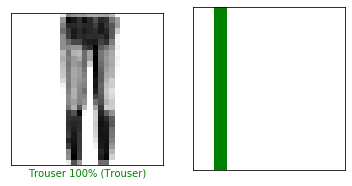

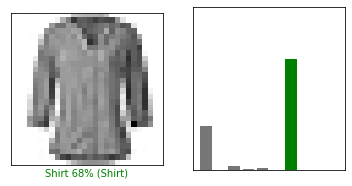

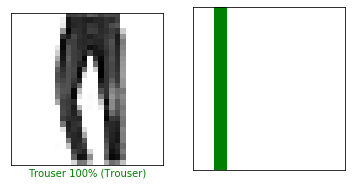

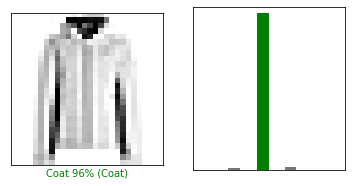

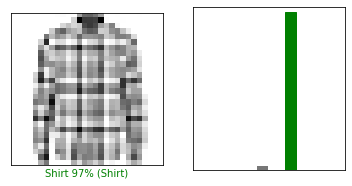

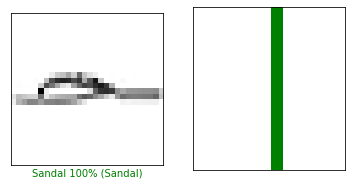

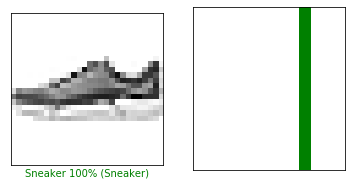

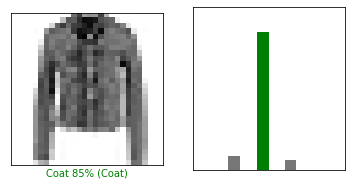

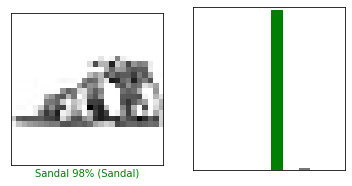

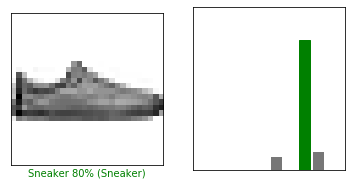

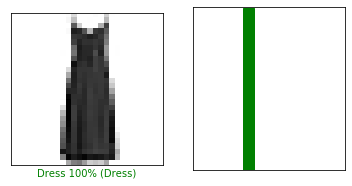

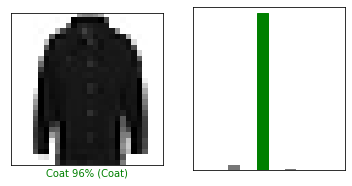

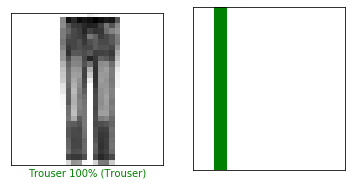

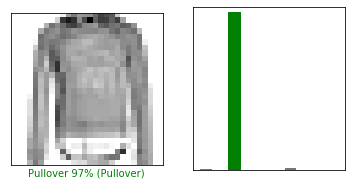

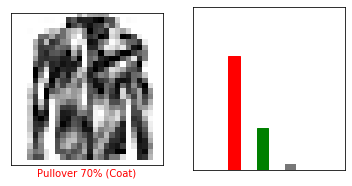

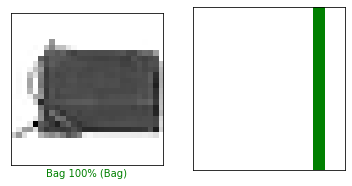

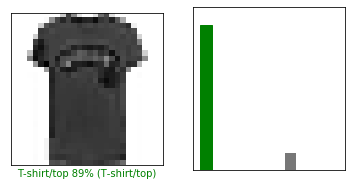

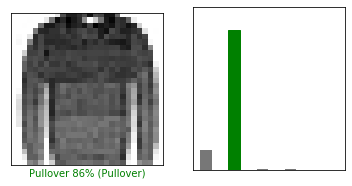

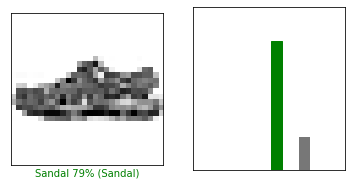

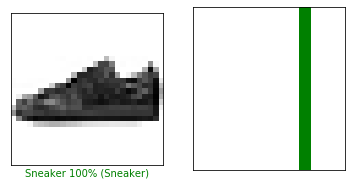

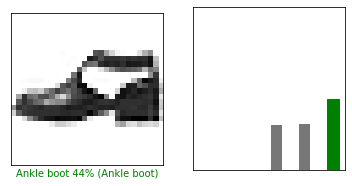

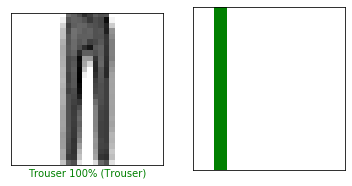

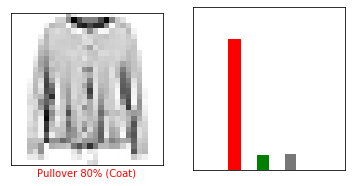

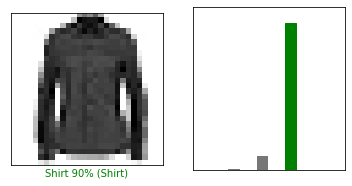

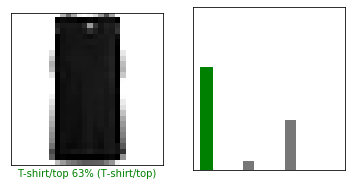

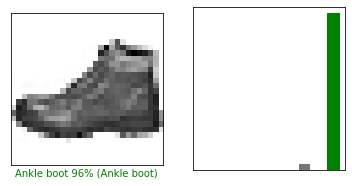

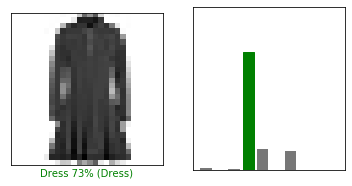

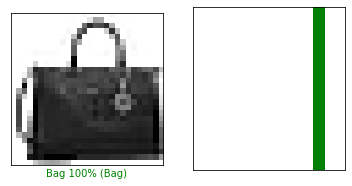

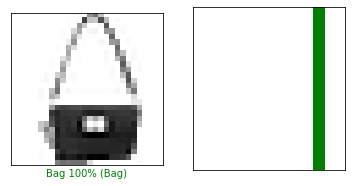

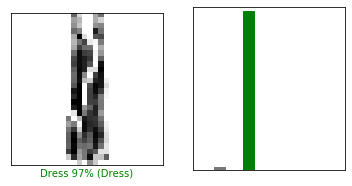

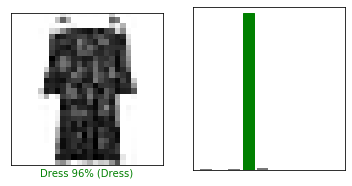

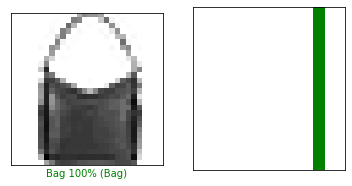

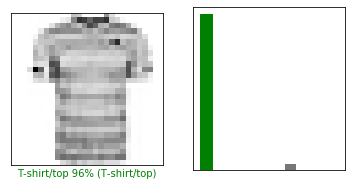

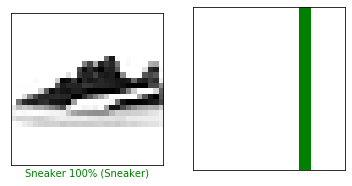

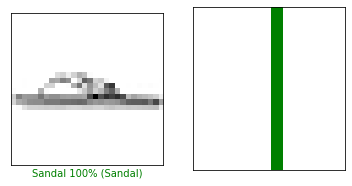

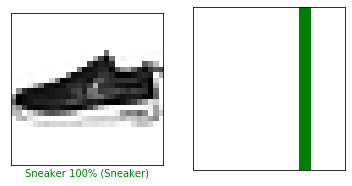

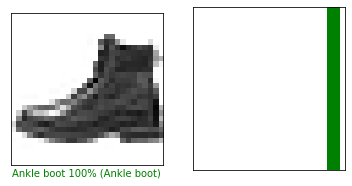

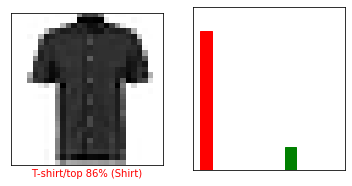

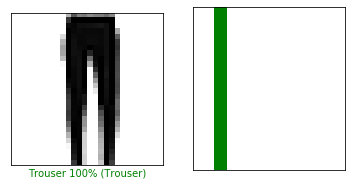

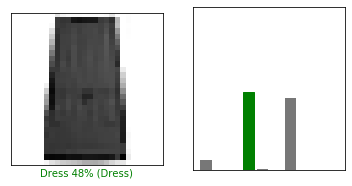

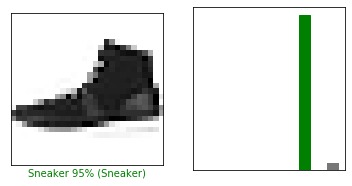

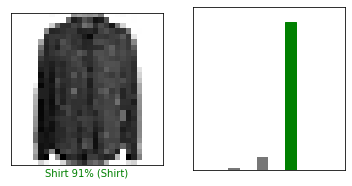

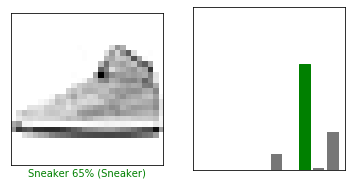

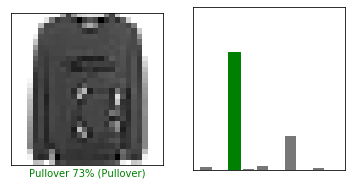

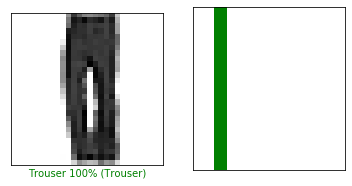

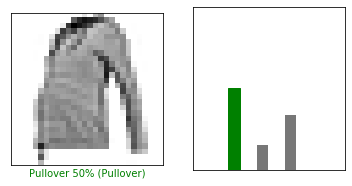

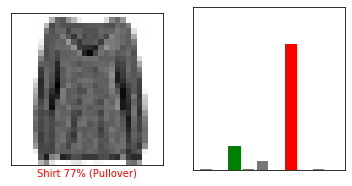

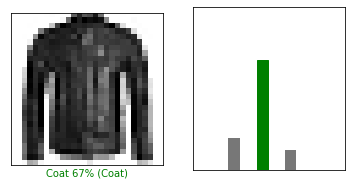

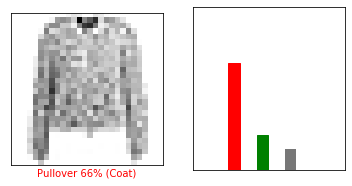

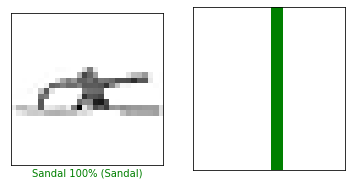

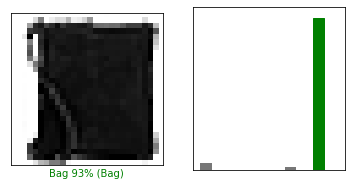

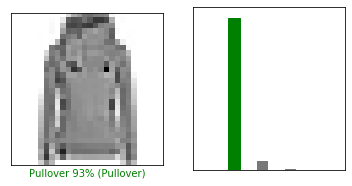

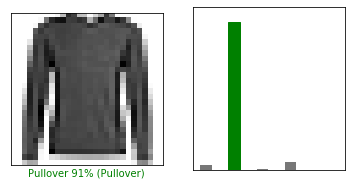

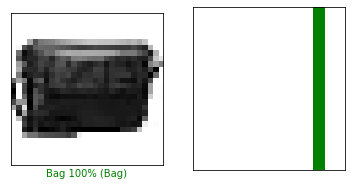

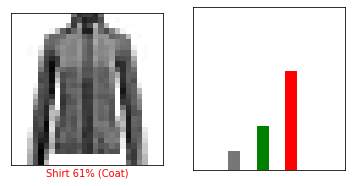

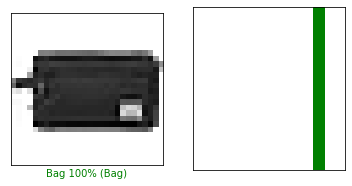

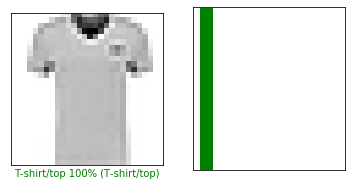

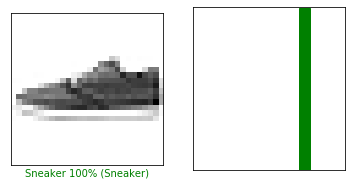

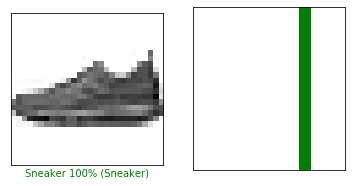

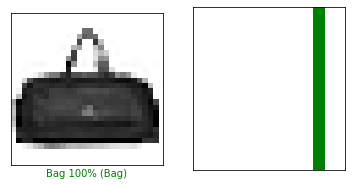

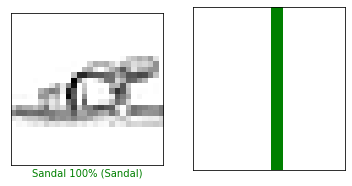

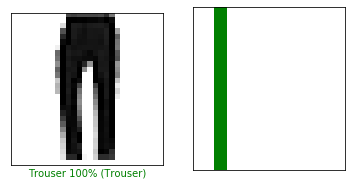

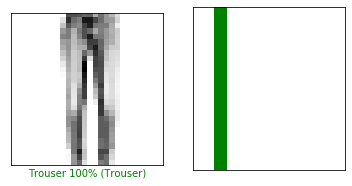

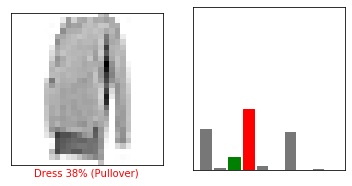

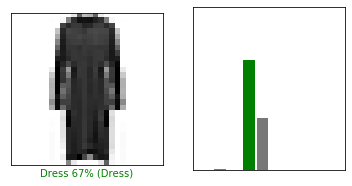

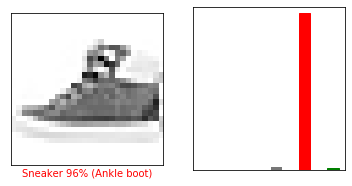

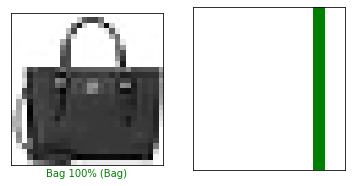

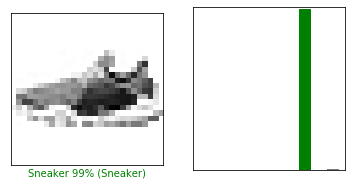

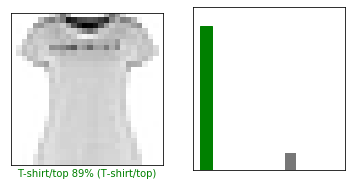

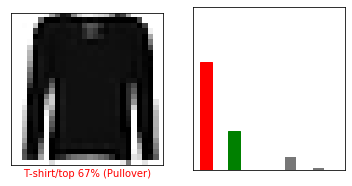

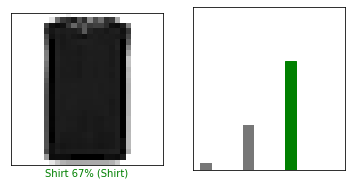

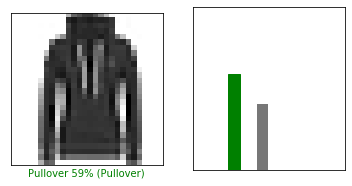

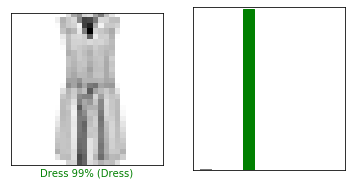

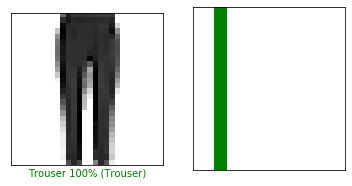

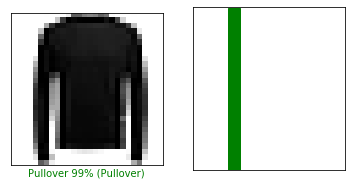

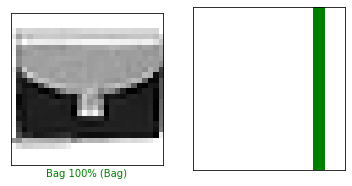

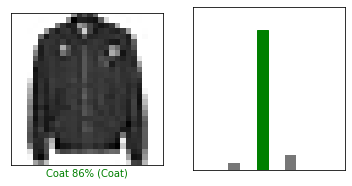

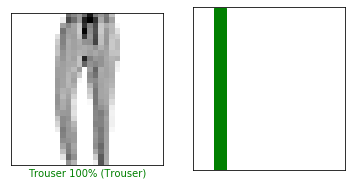

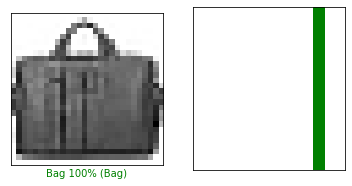

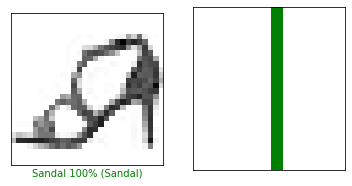

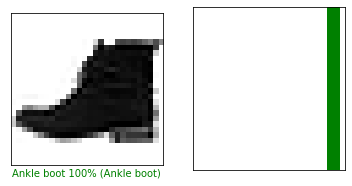

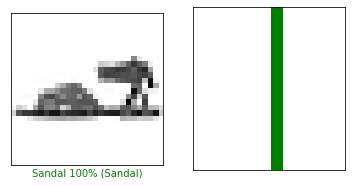

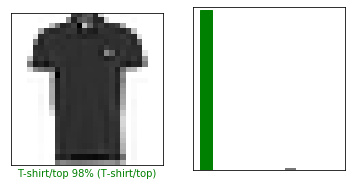

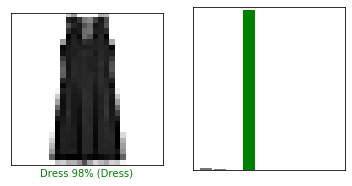

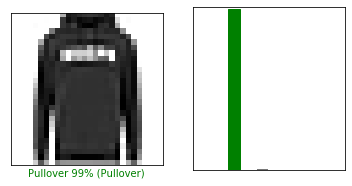

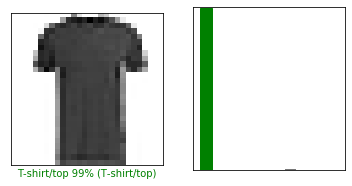

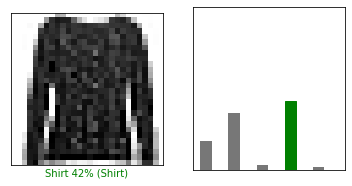

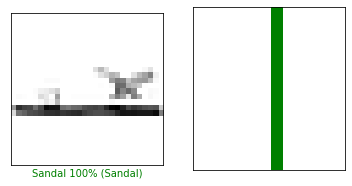

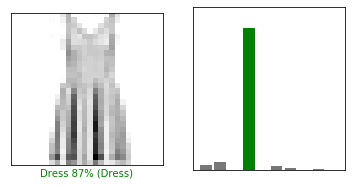

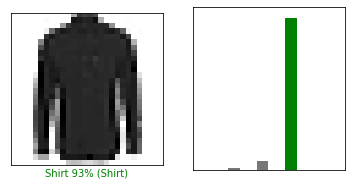

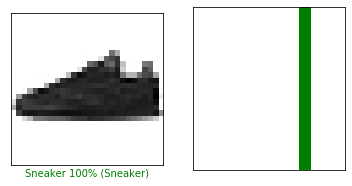

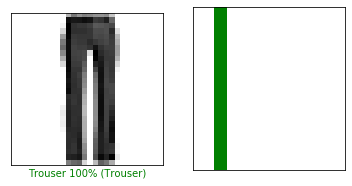

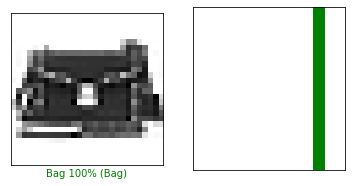

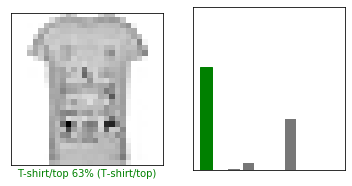

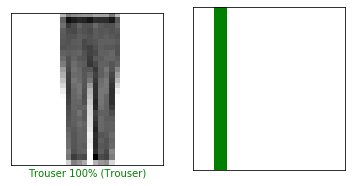

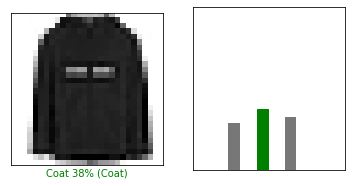

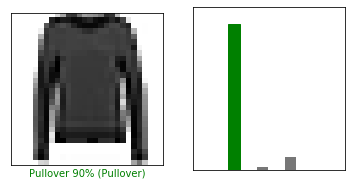

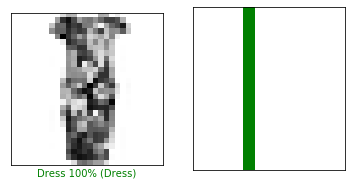

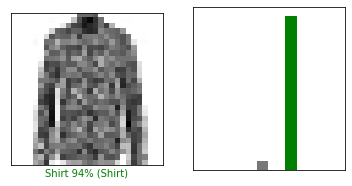

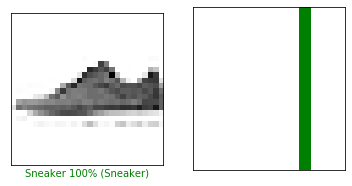

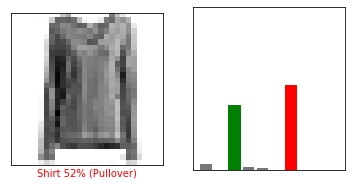

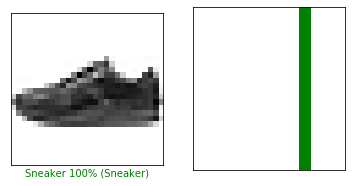

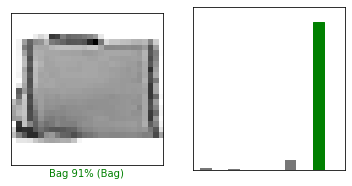

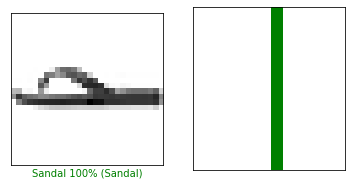

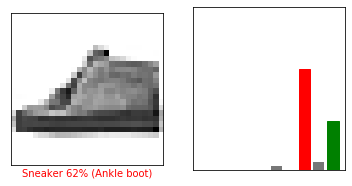

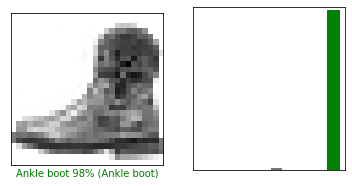

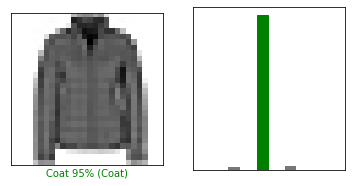

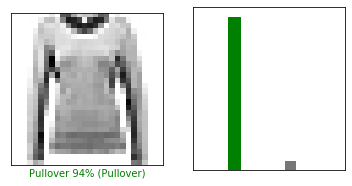

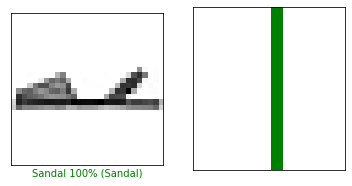

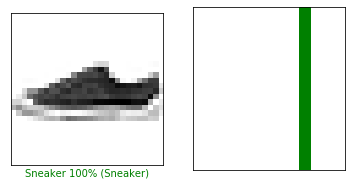

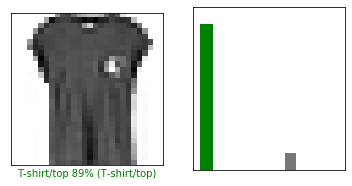

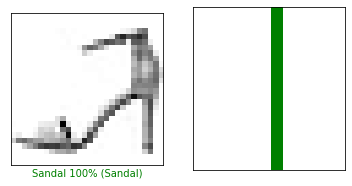

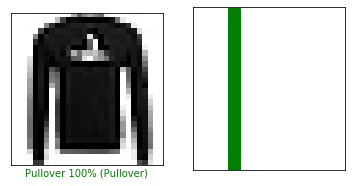

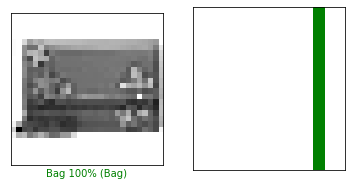

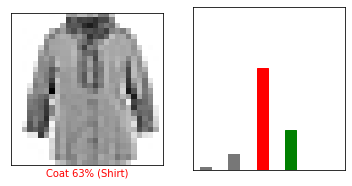

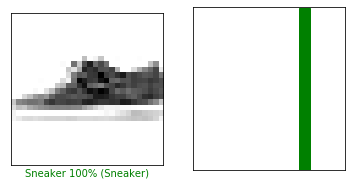

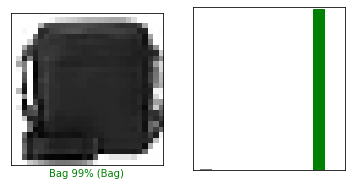

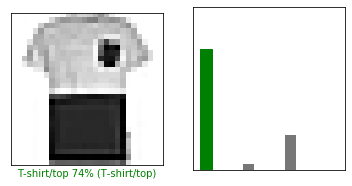

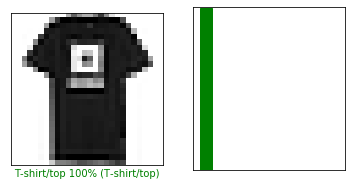

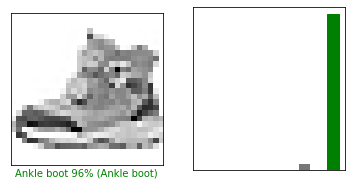

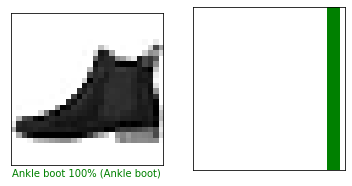

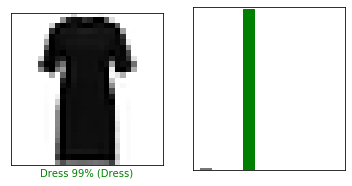

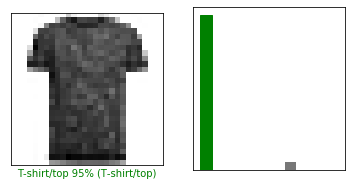

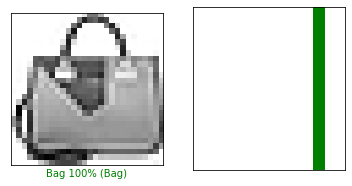

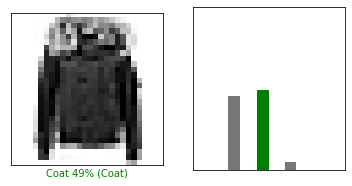

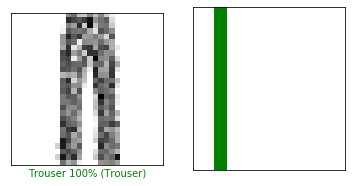

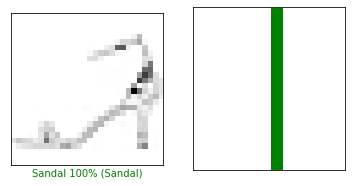

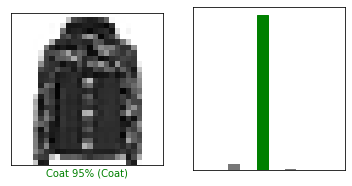

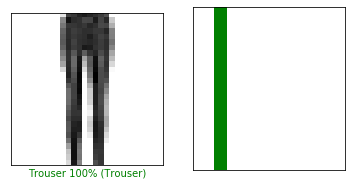

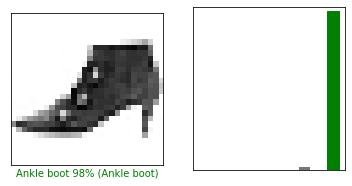

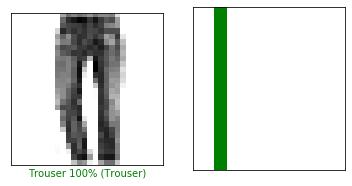

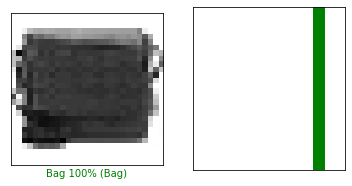

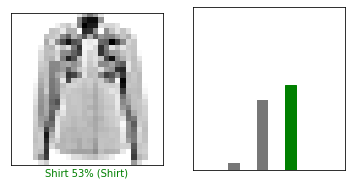

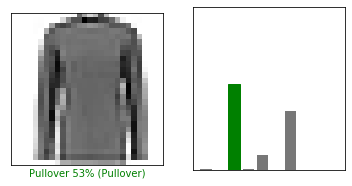

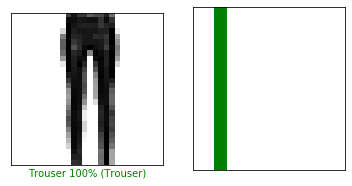

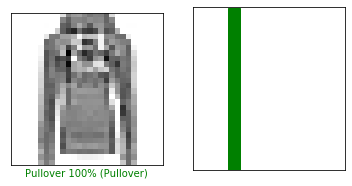

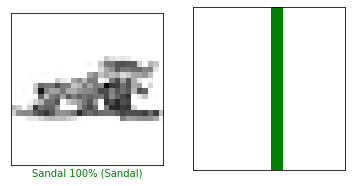

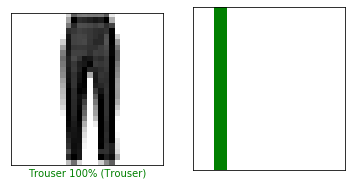

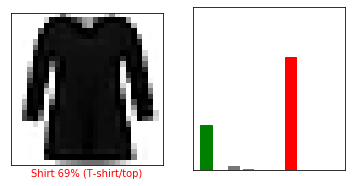

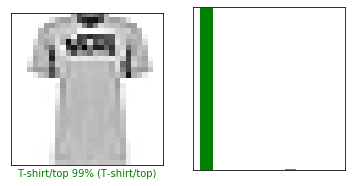

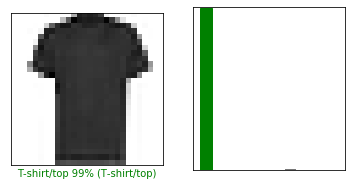

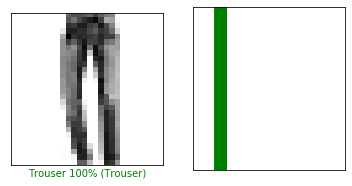

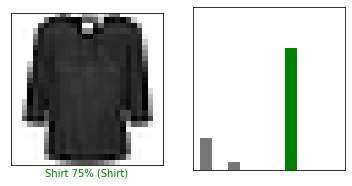

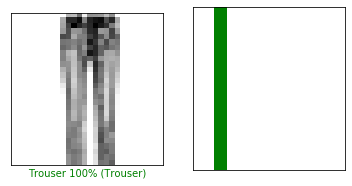

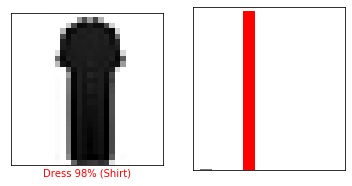

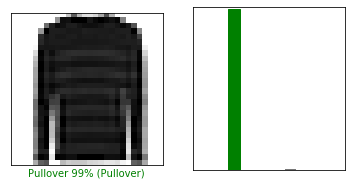

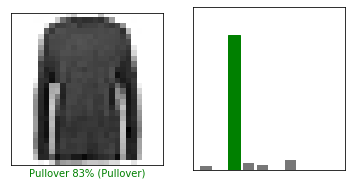

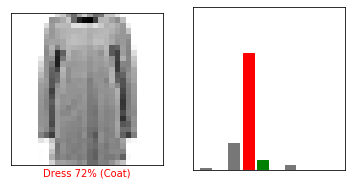

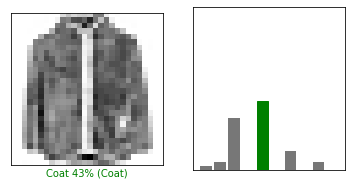

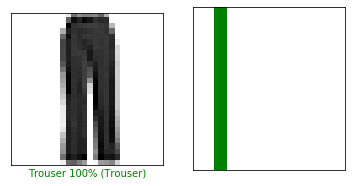

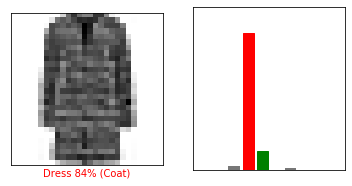

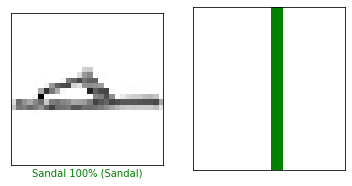

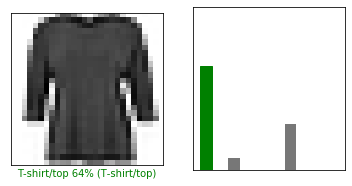

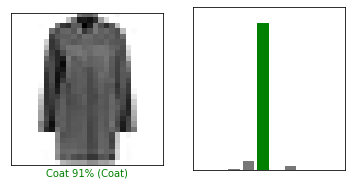

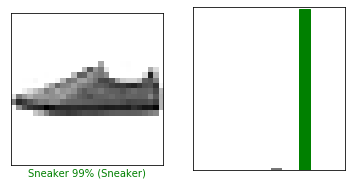

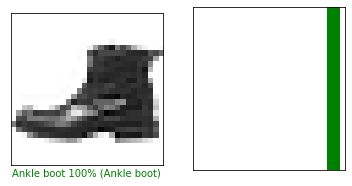

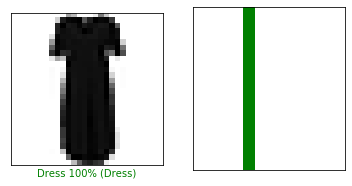

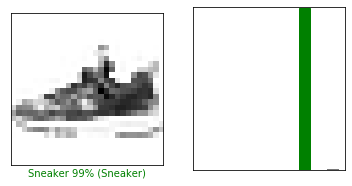

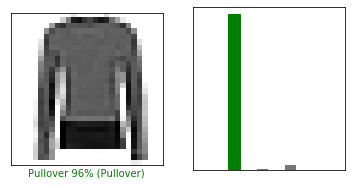

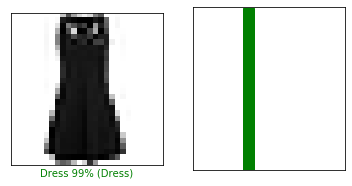

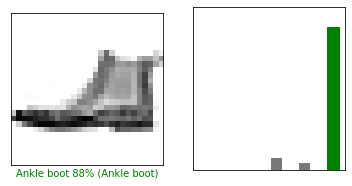

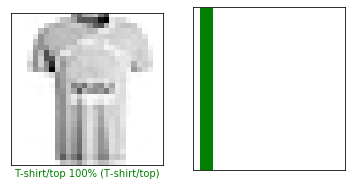

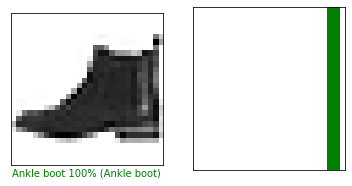

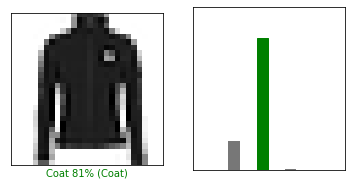

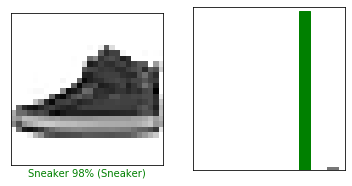

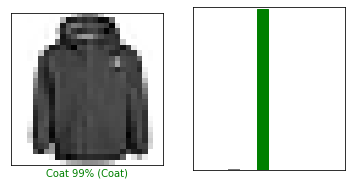

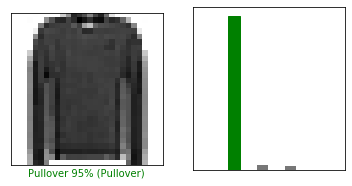

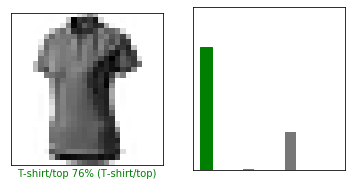

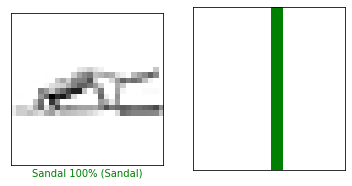

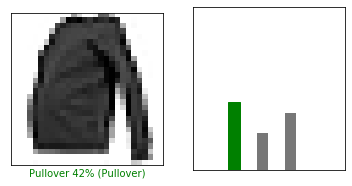

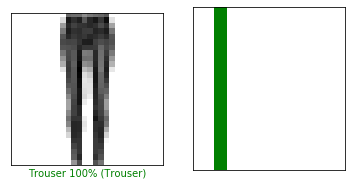

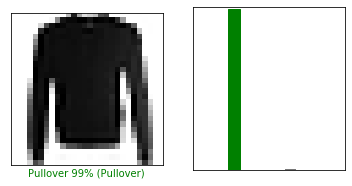

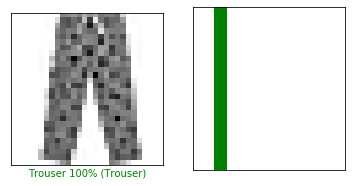

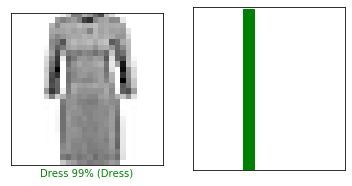

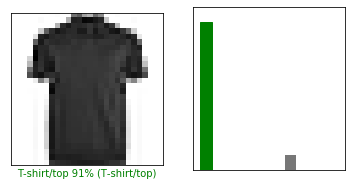

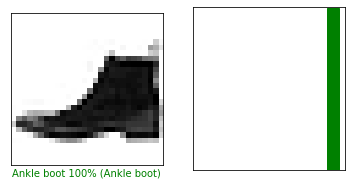

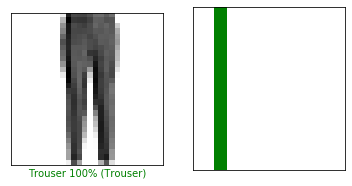

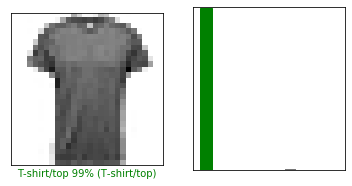

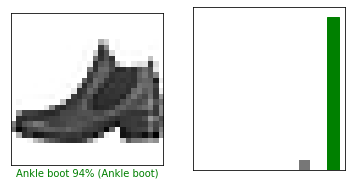

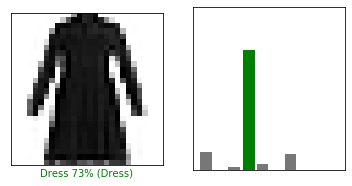

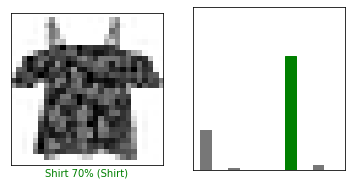

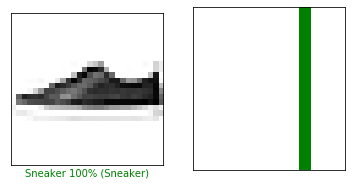

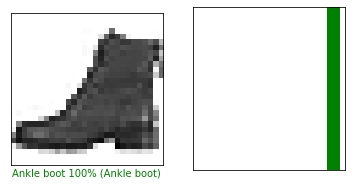

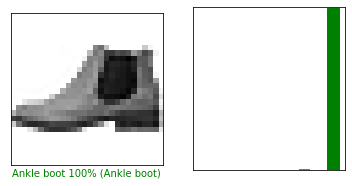

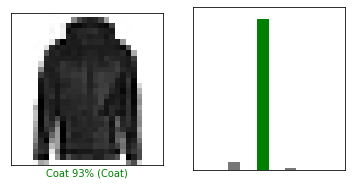

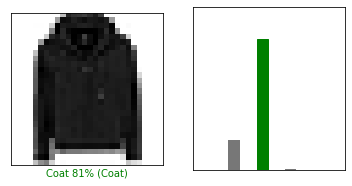

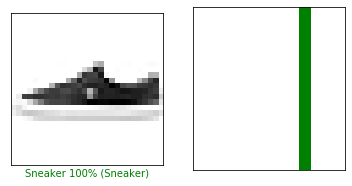

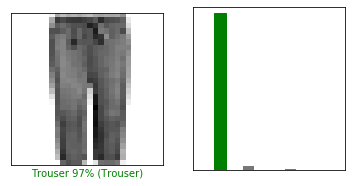

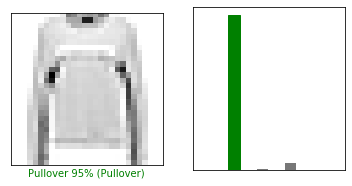

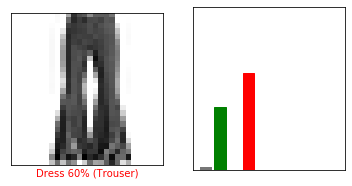

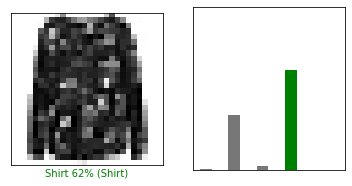

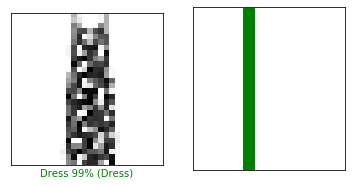

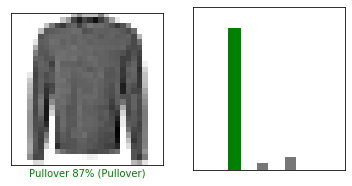

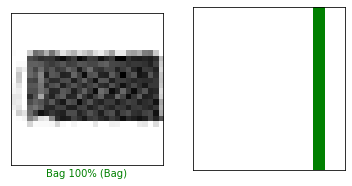

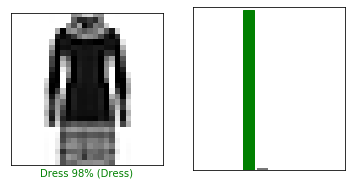

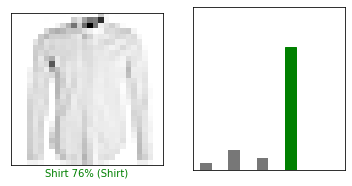

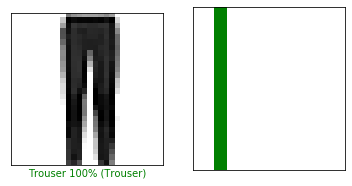

In [12]:
for i in range(0,200):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()
    